In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('strava.csv')
df.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:03,0.0,300.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:04,0.0,300.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,...,1.316,0.0,71.0,NaN,NaN,1316.0,2019-07-08 21:04:07,0.0,300.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,1.866,0.0,77.0,504432050.0,-999063637.0,1866.0,2019-07-08 21:04:14,0.0,100.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,1.894,0.0,80.0,504432492.0,-999064534.0,1894.0,2019-07-08 21:04:15,0.0,100.0,NaN


In [3]:
df['datetime'] = pd.to_datetime(df['timestamp']) 
df['datetime']

0       2019-07-08 21:04:03
1       2019-07-08 21:04:04
2       2019-07-08 21:04:07
3       2019-07-08 21:04:14
4       2019-07-08 21:04:15
                ...        
40644   2019-10-03 23:04:54
40645   2019-10-03 23:04:56
40646   2019-10-03 23:04:57
40647   2019-10-03 23:05:02
40648   2019-10-03 23:05:05
Name: datetime, Length: 40649, dtype: datetime64[ns]

In [4]:
# figure out the days that he is not exercising
# group data by days, and drop the rows whose values are all NaN
df_days_mean = df.resample('D', on='datetime').mean()
df_days_mean.dropna(how='all', inplace=True)
df_days_mean.drop(['Cadence', 'unknown_87', 'unknown_88', 'unknown_90', 'Air Power', 'Form Power', 'Ground Time', 'Leg Spring Stiffness', 'Power', 'Vertical Oscillation', 'enhanced_altitude', 'enhanced_speed', 'fractional_cadence', 'altitude', 'position_lat', 'position_long', 'speed'], axis=1, inplace=True)

Looking at the data above, we can infer that some columns may not be used for in our analysis work. We can simply disregard them.

In [5]:
df_days_mean

,cadence,distance,heart_rate
datetime,,,
2019-07-08,74.406504,1231.628293,118.337398
2019-07-10,79.314607,400.068652,130.123596
2019-07-12,74.135016,3585.156685,117.687157
2019-07-14,75.553472,3535.234931,113.642361
2019-07-16,76.100000,592.994176,118.858824
2019-07-17,76.509972,2579.805185,136.424501
2019-07-18,68.691071,2274.719152,115.176786
2019-07-20,74.512879,2841.590758,108.337121
2019-07-21,80.347985,1366.246374,129.340659


In [6]:
def get_range_info(df, datetime):
    """Finds the datetime that is the first recorded time given a date time"""
    mask = (df['datetime'].dt.year == datetime.year) & (df['datetime'].dt.month == datetime.month) & (df['datetime'].dt.day == datetime.day)
    df = df[mask]
    min_time = df.iloc[0]['datetime']
    max_time = df.iloc[-1]['datetime']
    duration = (max_time - min_time).total_seconds()
    dist_min = df.iloc[0]['distance']
    dist_max = df.iloc[-1]['distance']
    dist = dist_max - dist_min
    avg_speed = dist / duration
    return duration, dist, avg_speed
    

# get_range_info(df, df_days_mean.index[0])
values = []
for i in range(df_days_mean.shape[0]):
    values.append(get_range_info(df, df_days_mean.index[i]))
df_days_mean['duration'] = [x for x, _, _ in values]
df_days_mean['distance'] = [x for _, x, _ in values]
df_days_mean['avg_speed'] = [x for _, _, x in values]
df_days_mean.head()

,cadence,distance,heart_rate,duration,avg_speed
datetime,,,,,
2019-07-08,74.406504,2617.46,118.337398,1192.0,2.195856
2019-07-10,79.314607,834.85,130.123596,1160.0,0.719698
2019-07-12,74.135016,7471.84,117.687157,3786.0,1.973545
2019-07-14,75.553472,2612.05,113.642361,13463.0,0.194017
2019-07-16,76.100000,1704.76,118.858824,1110.0,1.535820


## Scatterplot

In [7]:
# plot scatterplot, boxplot, histogram
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

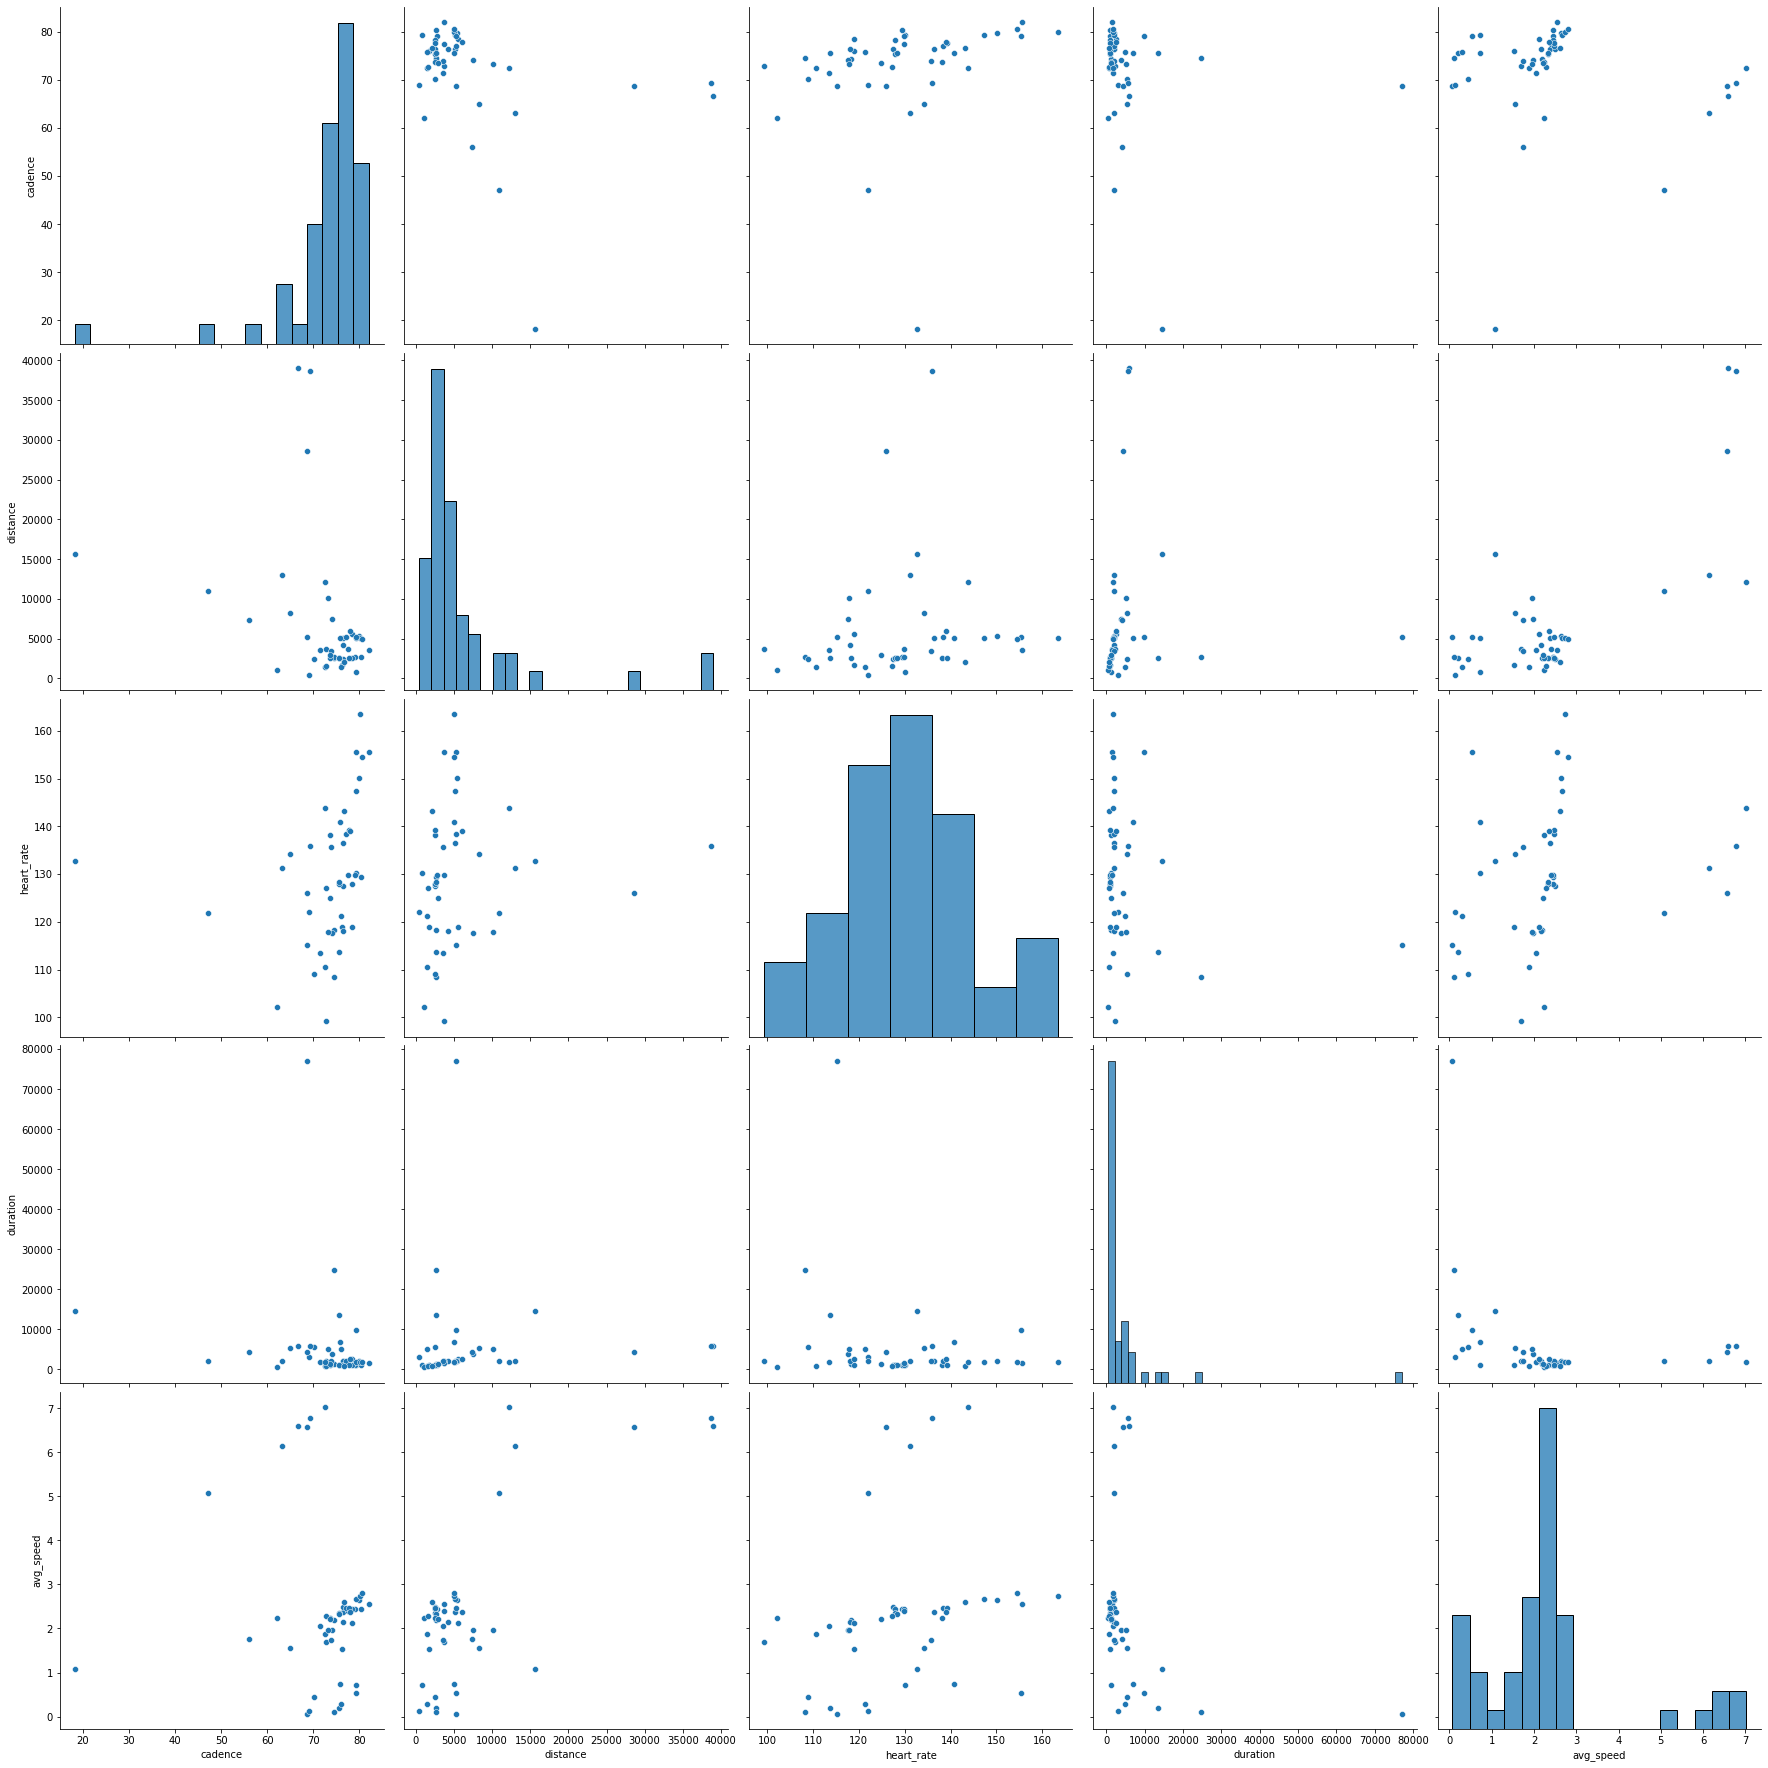

In [8]:
cols = ['cadence', 'distance', 'heart_rate', 'duration', 'avg_speed']
sns.pairplot(x_vars=cols, y_vars=cols, data=df_days_mean, height=5);

There are some outliers in this dataset. For example, in the scatterplot graph of heart rate vs duration, there are a couple of points that have abnormally high duration values. This could mean that the prof might be taking breaks in-between sessions of his exercise that particular day. We'll try to remove up some of these outliers and see how the data might look.

In [9]:
# find the rows that have abnormal data, implying that the professor has been
# taking too long breaks or there are multiple sessions of exercise in a day
indices = df_days_mean[(df_days_mean['avg_speed'] < 1) | (df_days_mean['duration'] > 10000)].index
df_days_mean.drop(indices, inplace=True)

# change some units
df_days_mean['distance'] = df_days_mean['distance'] / 1000

# define jogging vs cycling
df_days_mean['type'] = df_days_mean['avg_speed'].apply(lambda speed: 'jogging' if speed < 5 else 'cycling')
df_days_mean

,cadence,distance,heart_rate,duration,avg_speed,type
datetime,,,,,,
2019-07-08,74.406504,2.61746,118.337398,1192.0,2.195856,jogging
2019-07-12,74.135016,7.47184,117.687157,3786.0,1.973545,jogging
2019-07-16,76.100000,1.70476,118.858824,1110.0,1.535820,jogging
2019-07-17,76.509972,5.09147,136.424501,2150.0,2.368126,jogging
2019-07-21,80.347985,2.64923,129.340659,1085.0,2.441687,jogging
2019-07-22,79.111111,2.70712,129.774306,1109.0,2.441046,jogging
2019-07-23,77.491477,3.69889,129.789773,1539.0,2.403437,jogging
2019-07-25,72.505882,1.48540,110.631373,788.0,1.885025,jogging
2019-07-26,73.230542,10.08415,117.933005,5134.0,1.964190,jogging


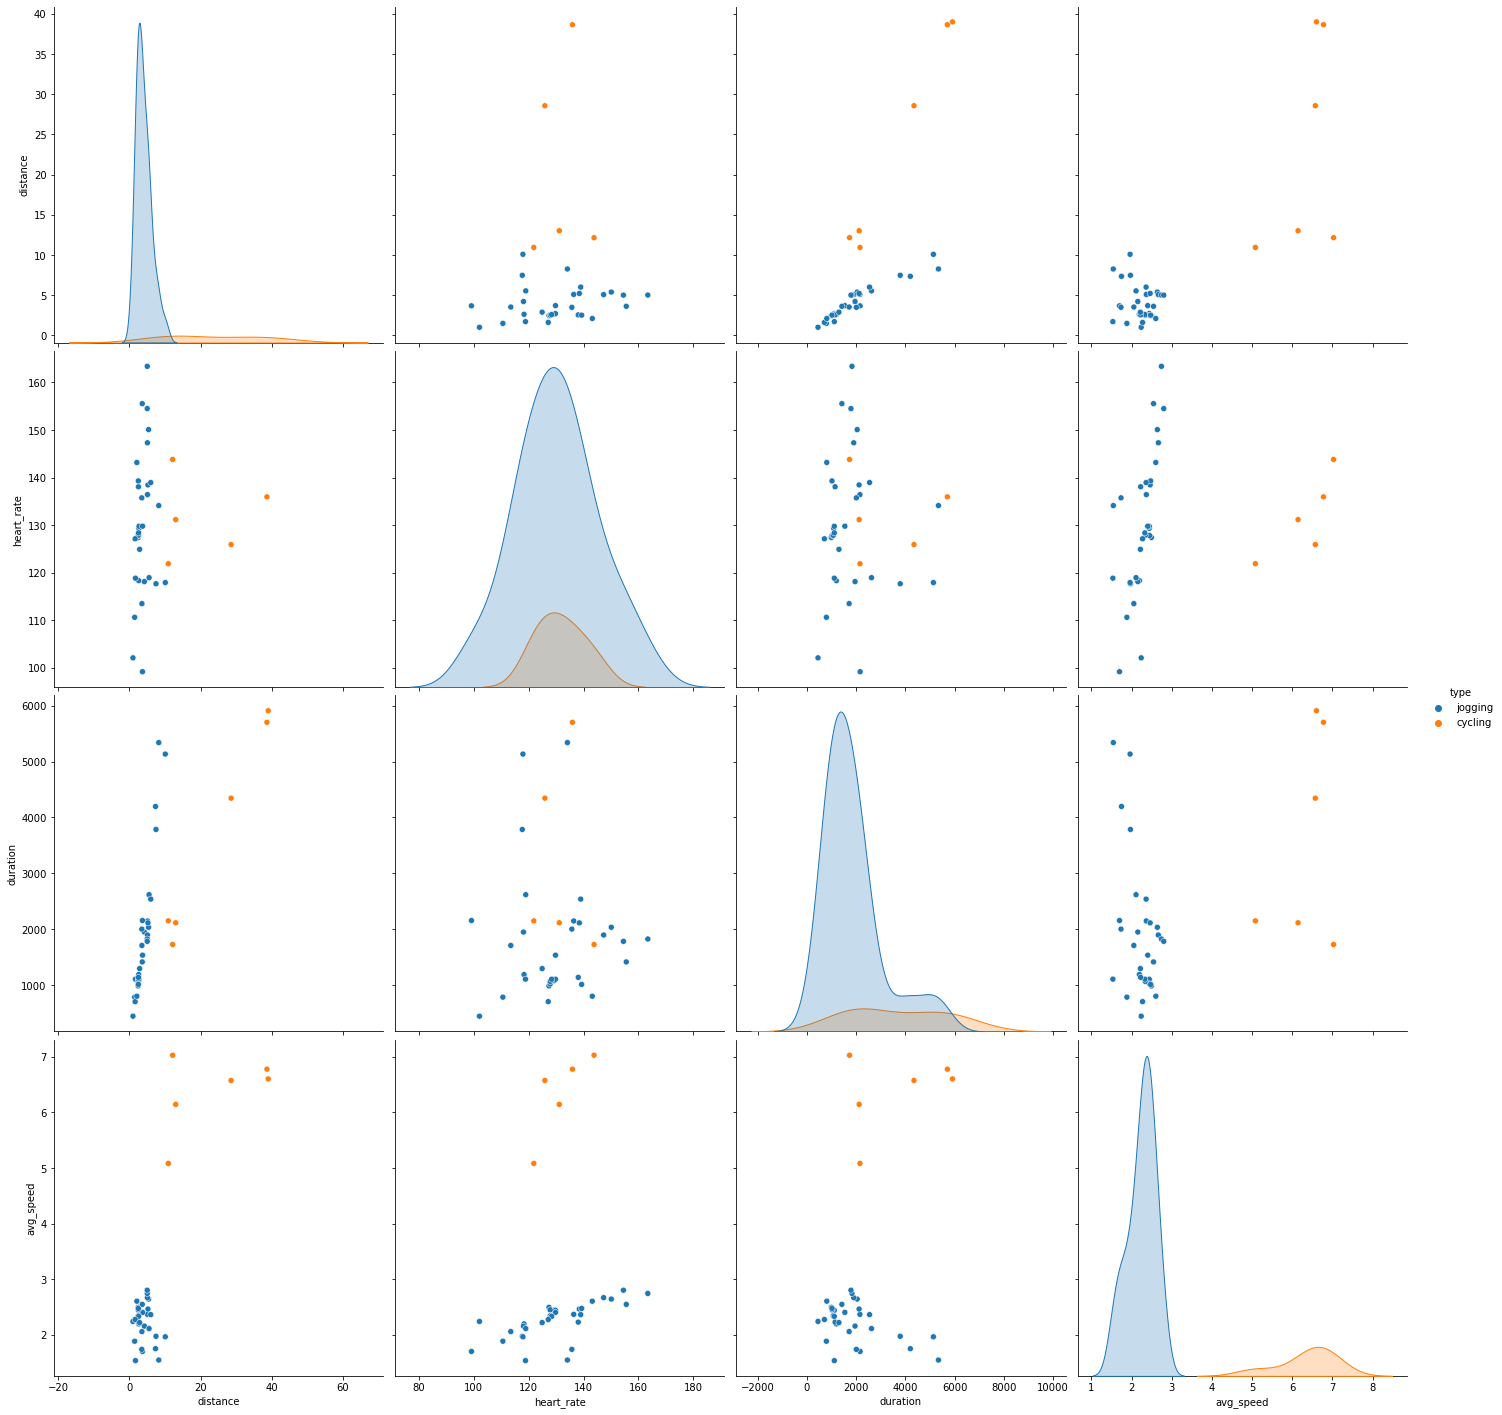

In [10]:
cols = ['distance', 'heart_rate', 'duration', 'avg_speed']
sns.pairplot(x_vars=cols, y_vars=cols, data=df_days_mean, height=5, hue='type');

Interesting takeaway:
1. distance vs heart rate - Most of the time, traveling at a greater distance greatly increases the average heart rate (jogging vs cycling)
2. duration vs distance - expected. the further the duration the further distance travelled. This graph reveals two slopes, one for jogging and one for cycling.
3. avg_speed vs. heart rate - for jogging, a slight increase in speed means greater increase in heart rate. for cycling, the increase in speed means less increase in heart rate.

[Text(0.5, 1.0, 'Distance vs. Heart Rate'),
 Text(0.5, 0, 'Distance (km)'),
 Text(0, 0.5, 'Average Heart Rate (bpm)')]

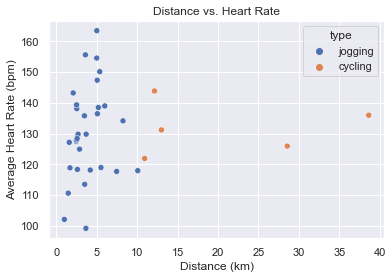

In [20]:
# plot those graph better
sns.set_theme()
sns.scatterplot(data=df_days_mean, x='distance', y='heart_rate', hue='type').set(title='Distance vs. Heart Rate', xlabel='Distance (km)', ylabel='Average Heart Rate (bpm)')

[Text(0.5, 1.0, 'Duration vs. Distance'),
 Text(0.5, 0, 'Duration (seconds)'),
 Text(0, 0.5, 'Distance (km)')]

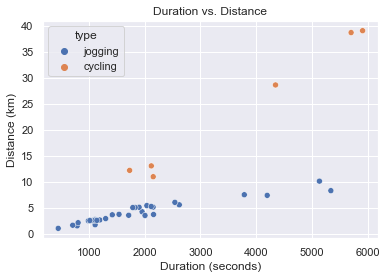

In [24]:
sns.scatterplot(data=df_days_mean, x='duration', y='distance', hue='type').set(title='Duration vs. Distance', xlabel='Duration (seconds)', ylabel='Distance (km)')

[Text(0.5, 1.0, 'Average Speed vs. Heart Rate'),
 Text(0.5, 0, 'Avg Speed (m/s)'),
 Text(0, 0.5, 'Heart Rate (bpm)')]

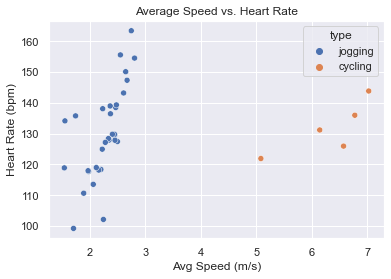

In [27]:
sns.scatterplot(data=df_days_mean, x='avg_speed', y='heart_rate', hue='type').set(title='Average Speed vs. Heart Rate', xlabel='Avg Speed (m/s)', ylabel='Heart Rate (bpm)')

## Boxplot

[Text(0.5, 1.0, 'Average Heart Rate per Session')]

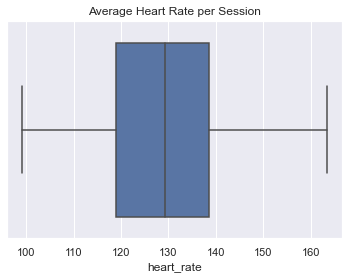

In [31]:
sns.boxplot(x='heart_rate', data=df_days_mean).set(title='Average Heart Rate per Session')

## Histogram of duration vs time